## Оглавление.
- <a href='#description'>Описание проекта.</a>
- <a href='#description_data'>Описание данных.</a>


- <a href='#part1'>Часть 1. Приоритизация гипотез.</a>
- <a href='#ab'>Часть 2. Анализ A/B теста </a> 
    - <a href='#a'>График кумулятивной выручки по группам</a>
    - <a href='#b'>График кумулятивного среднего чека по группам</a>
    - <a href='#c'>График относительного изменения кумулятивного среднего чека</a>
    - <a href='#d'>График кумулятивной конверсии по группам</a>
    - <a href='#e'>График относительного изменения кумулятивной конверсии</a>
    - <a href='#f'>Точечный график количества заказов по пользователям</a>
    - <a href='#g'>Точечный график стоимостей заказов</a>
    - <a href='#h'>Расчет статистической значимости различий в конверсии и среднем чеке между группами по «сырым» и «очищенным» данным.</a>
    
    
- <a href='#findings'>Общий вывод.</a>   



<a id='description'></a>
    
## Описание проекта.

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

<a id='description_data'></a>
## Описание данных.

Таблица ***hypothesis*** 
- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Таблица ***orders***
- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.

Таблица ***visitors***
- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

_______________
<a id='part1'></a>
## Часть 1. Приоритизация гипотез.

Применим фреймворки ICE и RICE для приоритезации гипотез. Отсортируем их по убыванию приоритета.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 150

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']/hypothesis['Efforts']

In [6]:
hypothesis.sort_values(by='ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [7]:
hypothesis.sort_values(by='RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE.

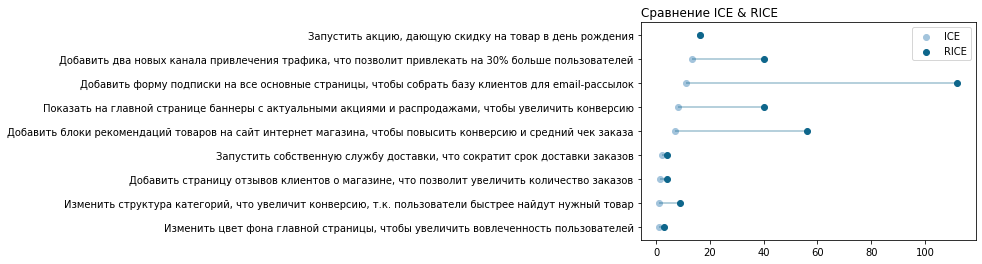

In [8]:
ordered_df = hypothesis.sort_values(by = 'ICE').reset_index() # Сортируем датасет по выбранной метрике и сбрасываем индекс
line_order = ordered_df.index

# Добавляем точки и линии
plt.hlines(y = line_order, xmin = ordered_df['ICE'], xmax = ordered_df['RICE'], color = '#0e668b', alpha = 0.4)
plt.scatter(ordered_df['ICE'], line_order, color = '#a3c4dc', label = 'ICE')
plt.scatter(ordered_df['RICE'], line_order, color = '#0e668b', label = 'RICE')
plt.legend()

# Подписываем
plt.yticks(line_order, ordered_df['Hypothesis'])
plt.title('Сравнение ICE & RICE', loc = 'left')
plt.show()

### Вывод
При использовании фремворка RICE - приоритетность практически всех гипотез увеличилась. Существенно выросли показатели тех гипотез,  проверка которых затронет большее количество пользователей. Все-таки в данном случае охват имеет существенное значение и с большим отрывом лидирует гипотеза, которая, вероятно, охватит **всех** пользователей - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

<a id='ab'></a>
## Часть 2. Анализ A/B теста.

Загрузим данные таблиц orders и visitors

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.head()
#приведем данные столбца date к нужному формату
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
orders.info()
print ('Количество явных дубликатов:', len(orders[orders.duplicated() == True]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
Количество явных дубликатов: 0


In [14]:
visitors.info()
print ('Количество явных дубликатов:', len(visitors[orders.duplicated() == True]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
Количество явных дубликатов: 0


Дубликатов и пропусков нет, проверим не пересекаются ли группы - не попал ли один и тот же пользователь одновременно в группу A и B

In [15]:
len (orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1'))

58

58 посетителей, которые попали в обе группы

In [16]:
# например
orders.query('visitorId == 8300375')

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


In [17]:
len(orders.visitorId.unique())

1031


    
**Вывод**
    
В таблицах ***visitors*** и ***orders*** нет пропусков и явных дубликатов.  
Есть 58 пользователей, которые попали в обе группы. Пересечений, конечно, стоит избегать в тесте, но в данном случае, с учетом того, что пользователей попавших в обе категории около 5%, думаю, что можно оставить эти данные.   
    

<a id='a'></a>
### Построим график кумулятивной выручки по группам.

In [18]:
#уникальные пары значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [19]:
#посчитаем кумулятивную выручку, количество заказов накопленным методом на каждый день теста
ordersAggregated = (datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionId' : pd.Series.nunique, 
          'visitorId' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))

In [20]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [21]:
#также посчитаем кол-во пользователей на каждый день теста
visitorsAggregated = (datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date' : 'max', 
                 'group' : 'max',
                 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))

In [22]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [23]:
#объеденим данные по выручке, пользователям и покупкам в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [24]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [26]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

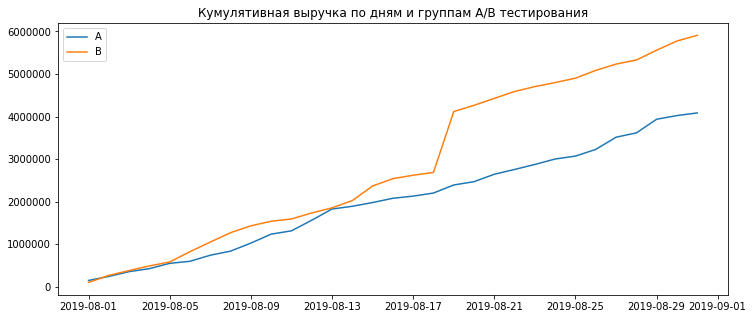

In [27]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по дням и группам A/B тестирования')
plt.show()

### Вывод
Выручка одновременно растет в обоих группах, однако в группе B есть резкий скачек, возможно это очень дорогие заказы, далее график принимает более равномерный вид. 

______
<a id='b'></a>
### Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

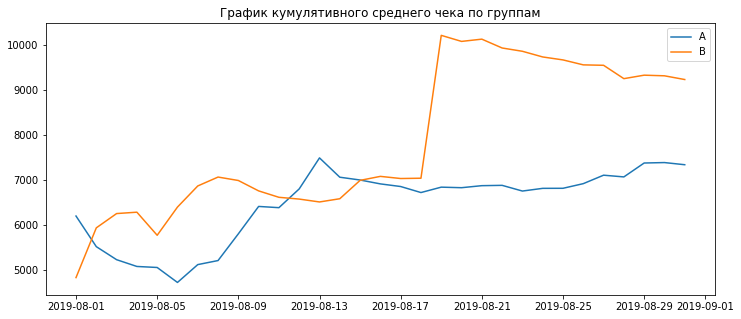

In [28]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show()

### Вывод
Да, возможно всплеск в графике группы B был именно из-за больших покупок. Средний чек резко вырос, а потом начал медленное снижение.

__________
<a id='c'></a>
### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

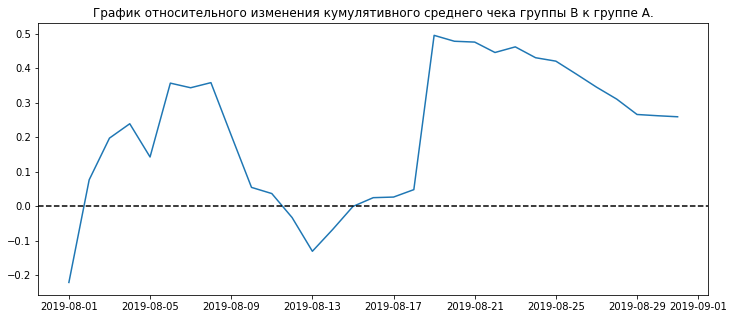

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.show()

### Вывод 
В графике есть сильный скачек, что свиделеьствует о крупных заказах и выбросах, о которых упоминалось ранее.



_______
<a id='d'></a>
### Построим график кумулятивной конверсии по группам.

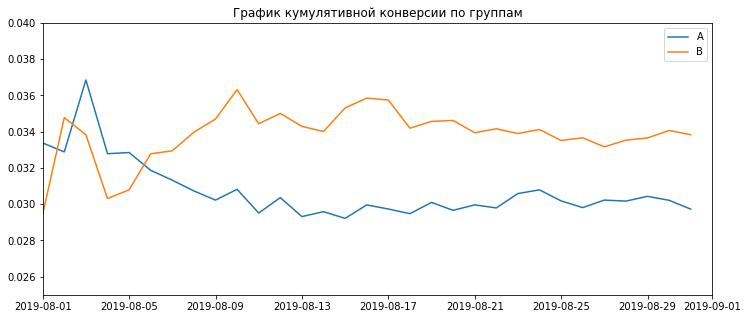

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.04])
plt.show()

### Вывод
За первую неделю теста конверсия группы B вышла вперед и зафиксировалась.

______
<a id='e'></a>
### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

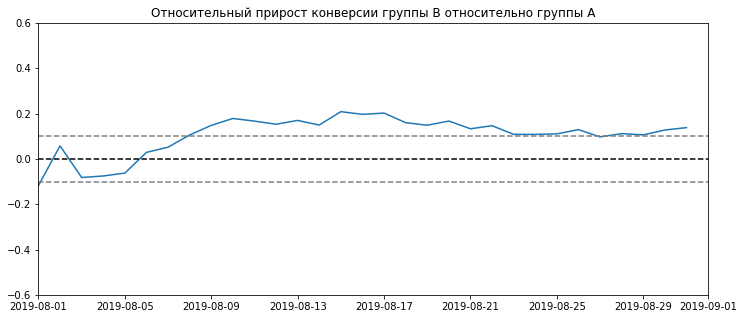

In [31]:

mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
plt.show()

### Вывод
В целом можно сделать вывод, что конверсия группы B по отношению к группе A выше и зафиксировалась примерно на уровне +10%


_________
<a id='f'></a>
### Построим точечный график количества заказов по пользователям.

In [32]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique}))

In [33]:
ordersByUsers.columns = ['visitorId','orders']

In [34]:
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


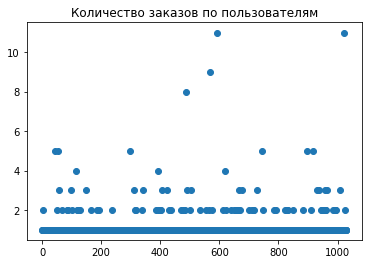

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Количество заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Большинство пользователей сделали 1-2 заказа.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

In [37]:
orders_95 = np.percentile(ordersByUsers['orders'], 95)

### Вывод
Не более 5% пользователей оформили больше 2 заказов. Выберем границу в 2 заказа для дальнейшего отсеивания аномальных пользователей.

________
<a id='g'></a>
### Построим точечный график стоимостей заказов.

In [38]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

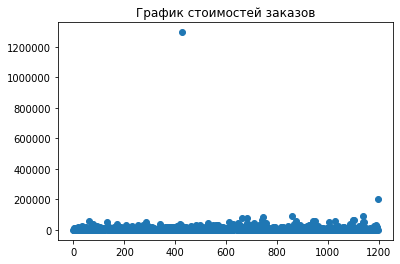

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
#plt.ylim(0, 300000)
plt.show()


Есть много дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 - 30 000.



Посмотрел на график без ограничений области, дополнительно проверил значения методом .describe()

Есть два больших выброса в группе B, которые конечно очень сильно повлияли на средний чек.     

In [40]:
orders.query('revenue > 150000')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

In [42]:
revenue_95 = np.percentile(orders['revenue'], 95)

### Вывод 
Не более 5% заказов дороже 28 000. Примем это значение как границу для суммы аномальных заказов.

______
<a id='h'></a>
### Расчет статистической значимости различий в конверсии и среднем чеке между группами по «сырым» и «очищенным» данным.

Для удобства расчетов и работы с "очищенными" данными создадим сводную таблицу, в которой будут данные для групп А и B как кумулятивные, так и по дням.


На данном этапе мы проверим если статистически значимое различие между результатами группы A и B (средний чек и конверсия), а также посмотрим повлияет ли работа с выбросами на результаты этих тестов. В нашем случае в данных есть большие выбросы, поэтому для проверки гипотез будем использовать непараметрический тест Манна-Уитни.
    
    
    

In [43]:
results = st.shapiro(orders['revenue'])
results[1]

0.0

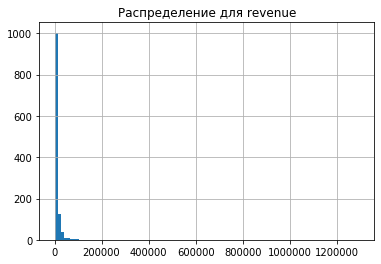

In [44]:
orders.revenue.hist(bins=100)
plt.title('Распределение для revenue')
plt.show()

По результату теста Шапиро Уилка (p-value = 0.0) делаем вывод, что распределение прибыли ненормальное. Для проверки гипотез используем тест Манна-Уитни.   

In [45]:
#группа А кумулятивная
visitorsACummulative = cumulativeDataA[['date','orders','revenue','visitors']]
visitorsACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA', 'visitorsCummulativeA']
#visitorsACummulative.head()

In [46]:
#группа B кумулятивная
visitorsBCummulative = cumulativeDataA[['date','orders','revenue','visitors']]
visitorsBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB','visitorsCummulativeB']
#visitorsBCummulative.head()

In [47]:
#группа А по дням
ordersADaily = (orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [48]:
#группа B по дням
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [49]:
#кол-во ежедневных посетителей в группах А и B
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [50]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')\
     .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
     .merge(visitorsBDaily, left_on='date', right_on='date', how='left')

In [51]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,visitorsCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsCummulativeB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,24,148579,21,101217,24,148579,719,24,148579,719,719,713
1,2019-08-02,20,93822,24,165531,44,242401,1338,44,242401,1338,619,581
2,2019-08-03,24,112473,16,114248,68,354874,1845,68,354874,1845,507,509
3,2019-08-04,16,70825,17,108571,84,425699,2562,84,425699,2562,717,770
4,2019-08-05,25,124218,23,92428,109,549917,3318,109,549917,3318,756,707


In [52]:
#пользователи хотя бы с 1 заказом для групп
ordersByUsersA = (orders[orders['group']=='A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group']=='B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

In [53]:
#пользователи и кол-во заказов, те кто не закзал ничего - 0
sampleA = pd.concat([ordersByUsersA['orders']
                     ,pd.Series(0
                                , index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                                , name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders']
                     ,pd.Series(0,
                                index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                                , name='orders')],axis=0)

In [54]:
print ('По "сырым" данным конверсия')
print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная конверсия: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

По "сырым" данным конверсия
p-value: 0.008
Относительная конверсия: 0.138


### Вывод
По "сырым" данным различия в конверсиях групп А и B есть (p-value < 0.05).  
Относительный выйгрыш группы B равен 13.8%

Найдём относительные различия в среднем чеке между группами

In [55]:
print ('По "сырым" данным средний чек')
print("p-value: {0:.3f}"
      .format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                              orders[orders['group']=='B']['revenue'])[1]))
print("Относительные различия в среднем чеке между группами {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()
                       /orders[orders['group']=='A']['revenue'].mean()-1))

По "сырым" данным средний чек
p-value: 0.365
Относительные различия в среднем чеке между группами 0.259


### Вывод
Рассчитанный p-value не дает оснований считать, что в среднем чеке между двумя группами есть различия. Однако стоит отметить, что средний чек группы B существенно выше среднего чека группы А.

Сделаем срезы по критериям, которые определили для аномальных пользователей. Посмотрим сколько всего таких пользователей.

In [56]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_95]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_95]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


Всего 74 пользователя.

Посмотрим на результаты теста на "очищенных" данных.

In [57]:
sampleAFiltered = (pd.concat( 
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders']
     ,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')]
    ,axis=0))

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders']
     ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')]
    ,axis=0)

In [58]:
print ('По "очищенным" данным конверсия')
print("p-value {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительная конверсия: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

По "очищенным" данным конверсия
p-value 0.007
Относительная конверсия: 0.173


### Вывод 
По очищенным данным результаты конверсии увеличились до 17.3%.

Посмотрим на результаты по среднему чеку.

In [59]:
print ('По "очищенным" данным средний чек')
print("p-value {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительные различия в среднем чеке между группами {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

По "очищенным" данным средний чек
p-value 0.369
Относительные различия в среднем чеке между группами -0.020


###  Вывод
По очищенным данным средний чек практически не отличается между двумя группами.

<a id='findings'></a>
## Общий вывод


- Есть статистически значимое различие по конверсии между группами как по "сырым" данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным;  
- По <a href='#e'>графику</a>  различия конверсии между группами можно сказать, что результаты группы B лучше группы A.


Исходя из обнаруженных фактов, тест рекомендую остановить и признать его успешным.




Рекомендую для дальнейшей работы выбрать группу B, как группу с лучшими результатами по конверсии.